<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Признаки" data-toc-modified-id="Признаки-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Признаки</a></span></li><li><span><a href="#Целевой-признак" data-toc-modified-id="Целевой-признак-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Целевой признак</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

In [1]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
import numpy as np



In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [5]:
print(data['RowNumber'].value_counts().sum())
print(data['CustomerId'].value_counts().sum())
print(data['Surname'].value_counts().sum())

10000
10000
10000


После загрузки датафрейма три столбца имеют абсолюно уникальные значения, их можно удалить, так как это может только снизить точность модели

In [6]:
data = data.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [7]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [8]:
data.isna().sum()

CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [9]:
data['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [10]:
data[data['Tenure'].isna()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...
9944,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


5.0
4.997690023099769


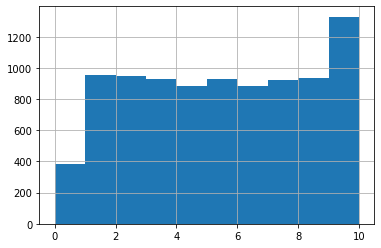

In [11]:
data['Tenure'].hist()
print(data['Tenure'].median())
print(data['Tenure'].mean())

скорее всего пропуски у тех, кто в банке первый год

In [12]:
data.fillna(5, inplace=True)

In [13]:
data['Tenure'].value_counts()

5.0     1836
1.0      952
2.0      950
8.0      933
3.0      928
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
0.0      382
Name: Tenure, dtype: int64

5.0
4.9979


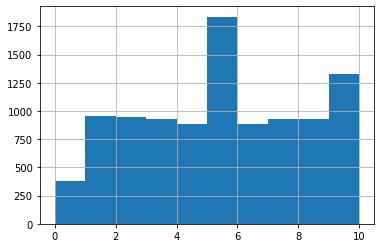

In [14]:
data['Tenure'].hist()
print(data['Tenure'].median())
print(data['Tenure'].mean())

In [15]:
data.shape

(10000, 11)

In [16]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [17]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [18]:
data_ohe.shape

(10000, 12)

In [19]:
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


В новом датафрейме мы получили 12 столбцов. В столбце Geography исходно 3 класса, а в Gender_Male 2 класса — в результате мы получили только 2 и 1 столбцов соответственно, что позволяет избежать дами-ловушки.

Формируем выборки для обучения модели 

In [20]:
features = data_ohe.drop('Exited', axis=1)
target = data_ohe['Exited']

In [21]:
print(features.shape)
print(target.shape)

(10000, 11)
(10000,)


In [22]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=12345, stratify=data_ohe['Exited']) 
features_test, features_valid, target_test, target_valid = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345, stratify=target_valid) 


print('Размер тренериующей выборки', features_train.shape[0])
print('Размер валидационной выборки', features_valid.shape[0])
print('Размер тестовой выборки', features_test.shape[0])

print('Соотношение тренериующей выборки',target_train.value_counts(True))
print('Соотношение валидационной выборки',target_valid.value_counts(True))
print('Соотношение тестовой выборки', target_test.value_counts(True))

Размер тренериующей выборки 6000
Размер валидационной выборки 2000
Размер тестовой выборки 2000
Соотношение тренериующей выборки 0    0.796333
1    0.203667
Name: Exited, dtype: float64
Соотношение валидационной выборки 0    0.7965
1    0.2035
Name: Exited, dtype: float64
Соотношение тестовой выборки 0    0.796
1    0.204
Name: Exited, dtype: float64


разбили выборки с сохранением баланса классов целевого признака

In [23]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])



/tmp/ipykernel_115/4046132600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [24]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2837,-1.040434,0.953312,0.360600,0.774657,-0.914708,0,1,-0.119110,1,0,0
9925,0.454006,-0.095244,-0.002786,1.910540,-0.914708,1,1,-0.258658,0,0,0
8746,0.103585,-0.476537,1.087371,0.481608,0.820981,0,1,1.422836,0,0,1
660,-0.184996,0.190726,-0.002786,0.088439,-0.914708,1,1,-1.160427,1,0,0
3610,-0.720933,1.620574,-1.456328,0.879129,-0.914708,1,0,0.113236,0,0,0


In [25]:
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
657,-0.504497,1.429928,-1.456328,0.873883,0.820981,1,1,1.725255,1,0,0
2083,-1.195031,-1.429769,-1.456328,-1.219673,-0.914708,1,1,1.203665,0,0,1
3234,-1.267176,0.762665,-1.456328,-1.219673,-0.914708,1,0,-1.374743,0,0,1
1551,0.825039,1.239281,0.723985,-1.219673,0.820981,0,1,0.382306,0,1,0
2344,0.660135,0.953312,-0.366172,0.267087,-0.914708,1,0,-1.613578,1,0,0


In [26]:
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6612,-1.524838,2.383160,-0.729557,1.011655,-0.914708,0,1,0.010275,0,0,0
519,0.587990,1.811221,0.360600,0.213192,-0.914708,0,1,0.453089,0,0,1
1609,-0.318980,-0.381213,1.087371,0.893896,-0.914708,1,0,-0.603508,0,0,0
3475,1.226991,-0.762506,-0.366172,-0.240363,0.820981,1,1,-1.621460,0,0,1
2707,-0.133464,-0.095244,-0.729557,0.447305,-0.914708,0,0,0.338574,0,0,0


провели масштабирование признаков

## Исследование задачи

In [27]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2837,-1.040434,0.953312,0.360600,0.774657,-0.914708,0,1,-0.119110,1,0,0
9925,0.454006,-0.095244,-0.002786,1.910540,-0.914708,1,1,-0.258658,0,0,0
8746,0.103585,-0.476537,1.087371,0.481608,0.820981,0,1,1.422836,0,0,1
660,-0.184996,0.190726,-0.002786,0.088439,-0.914708,1,1,-1.160427,1,0,0
3610,-0.720933,1.620574,-1.456328,0.879129,-0.914708,1,0,0.113236,0,0,0


In [28]:
best_model_tree = None
best_result = 0
for depth in range(1,21): 
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    valid_predictions = model.predict(features_valid)
    result = f1_score(target_valid, valid_predictions)
    if result > best_result:
        best_depth = depth
        best_model_tree = model
        best_result = result
print("F1 наилучшей модели на валидационной выборке:", best_result)
print('Глубина наилучшей модели на валидационной выборке:',  best_depth)

F1 наилучшей модели на валидационной выборке: 0.5533834586466165
Глубина наилучшей модели на валидационной выборке: 7


In [29]:
model = DecisionTreeClassifier(max_depth=best_depth, random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print('accuracy:', accuracy_score(target_valid, predicted_valid))
print(confusion_matrix(target_valid, predicted_valid))
print('recall:', recall_score(target_valid, predicted_valid))
print('precision:', precision_score(target_valid, predicted_valid))
print('f1:', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
# < напишите код здесь >

print('AUC_ROC:', auc_roc)

accuracy: 0.8515
[[1519   74]
 [ 223  184]]
recall: 0.4520884520884521
precision: 0.7131782945736435
f1: 0.5533834586466165
AUC_ROC: 0.8118303203048964


In [30]:
best_model_forest = None
best_result = 0
for est in range(1, 50):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_train, target_train) 
    valid_predictions = model.predict(features_valid)
    result = f1_score(target_valid, valid_predictions)
    if result > best_result:
        best_est = est
        best_model_forest = model
        best_result = result

print("F1 наилучшей модели на валидационной выборке:", best_result)
print('Количество деревьев наилучшей модели на валидационной выборке:',  best_est)

best_model_forest = None
best_result = 0
for depth in range(1, 50):
    model = RandomForestClassifier(max_depth=depth, random_state=12345, n_estimators=best_est) 
    model.fit(features_train, target_train) 
    valid_predictions = model.predict(features_valid)
    result = f1_score(target_valid, valid_predictions)
    if result > best_result:
        best_depth = depth
        best_model_forest = model
        best_result = result

print("F1 наилучшей модели на валидационной выборке:", best_result)
print('Глубина деревьев наилучшей модели на валидационной выборке:',  best_depth)

F1 наилучшей модели на валидационной выборке: 0.5484351713859912
Количество деревьев наилучшей модели на валидационной выборке: 27
F1 наилучшей модели на валидационной выборке: 0.562874251497006
Глубина деревьев наилучшей модели на валидационной выборке: 19


In [31]:
model = RandomForestClassifier(random_state=12345, n_estimators=best_est, max_depth=best_depth ) 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print('accuracy:', accuracy_score(target_valid, predicted_valid))
print(confusion_matrix(target_valid, predicted_valid))
print('recall:', recall_score(target_valid, predicted_valid))
print('precision:', precision_score(target_valid, predicted_valid))
print('f1:', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('AUC_ROC:', auc_roc)

accuracy: 0.854
[[1520   73]
 [ 219  188]]
recall: 0.4619164619164619
precision: 0.7203065134099617
f1: 0.562874251497006
AUC_ROC: 0.8358335222742003


Лучшая модель пока случайный лес, однако из-за возможного дисбаланса классов в целевом признаке модель имеет не высокий f1 score

Оценим баланс классов в целевом признаке

0    0.7963
1    0.2037
Name: Exited, dtype: float64


<AxesSubplot:>

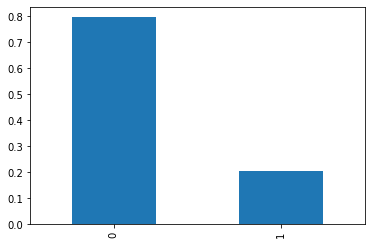

In [34]:
class_frequency = data['Exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

Наблюдается дисбаланс классов в датафрейме. Объектов отрицательного класса в 4 раза больше.

## Борьба с дисбалансом

In [35]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [36]:
target_upsampled.value_counts()

1    4888
0    4778
Name: Exited, dtype: int64

In [37]:
best_model_tree = None
best_result = 0
for depth in range(1,21): 
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_upsampled, target_upsampled)
    valid_predictions = model.predict(features_valid)
    result = f1_score(target_valid, valid_predictions)
    if result > best_result:
        best_depth = depth
        best_model_tree = model
        best_result = result
print("F1 наилучшей модели на валидационной выборке:", best_result)
print('Глубина наилучшей модели на валидационной выборке:',  best_depth)

F1 наилучшей модели на валидационной выборке: 0.5461187214611872
Глубина наилучшей модели на валидационной выборке: 7


In [38]:
predicted_valid = best_model_tree.predict(features_valid)

print('accuracy:', accuracy_score(target_valid, predicted_valid))
print(confusion_matrix(target_valid, predicted_valid))
print('recall:', recall_score(target_valid, predicted_valid))
print('precision:', precision_score(target_valid, predicted_valid))
print('f1:', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('AUC_ROC:', auc_roc)

accuracy: 0.7515
[[1204  389]
 [ 108  299]]
recall: 0.7346437346437347
precision: 0.43459302325581395
f1: 0.5461187214611872
AUC_ROC: 0.6676599557955489


In [39]:
best_model_forest = None
best_result = 0
for est in range(1, 50):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_upsampled, target_upsampled) 
    valid_predictions = model.predict(features_valid)
    result = f1_score(target_valid, valid_predictions) 
    if result > best_result:
        best_est = est
        best_model_forest = model
        best_result = result

print("f1 наилучшей модели на валидационной выборке:", best_result)
print('Количество деревьев наилучшей модели на валидационной выборке:',  best_est)

best_model_forest = None
best_result = 0
for depth in range(1, 50):
    model = RandomForestClassifier(max_depth=depth, random_state=12345, n_estimators=best_est) 
    model.fit(features_upsampled, target_upsampled) 
    valid_predictions = model.predict(features_valid)
    result = f1_score(target_valid, valid_predictions) 
    if result > best_result:
        best_depth = depth
        best_model_forest = model
        best_result = result

print("F1 наилучшей модели на валидационной выборке:", best_result)
print('Глубина деревьев наилучшей модели на валидационной выборке:',  best_depth)

f1 наилучшей модели на валидационной выборке: 0.5748663101604278
Количество деревьев наилучшей модели на валидационной выборке: 49
F1 наилучшей модели на валидационной выборке: 0.6152173913043478
Глубина деревьев наилучшей модели на валидационной выборке: 9


In [40]:
predicted_valid = best_model_forest.predict(features_valid)

print('accuracy:', accuracy_score(target_valid, predicted_valid))
print(confusion_matrix(target_valid, predicted_valid))
print('recall:', recall_score(target_valid, predicted_valid))
print('precision:', precision_score(target_valid, predicted_valid))
print('f1:', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('AUC_ROC:', auc_roc)

accuracy: 0.823
[[1363  230]
 [ 124  283]]
recall: 0.6953316953316954
precision: 0.5516569200779727
f1: 0.6152173913043478
AUC_ROC: 0.8419374690561131


In [41]:
best_model_log = None
best_result = 0
for i in range(100, 1050, 50):
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=i) 
    model.fit(features_upsampled, target_upsampled) 
    valid_predictions = model.predict(features_valid)
    result = f1_score(target_valid, valid_predictions)
    if result > best_result:
        best_iter = i 
        best_model_log = model
        best_result = result

print("F1 наилучшей модели на валидационной выборке:", best_result)
print('Итерация наилучшей модели на валидационной выборке:',  best_iter)

F1 наилучшей модели на валидационной выборке: 0.47822374039282667
Итерация наилучшей модели на валидационной выборке: 100


In [42]:
predicted_valid = best_model_log.predict(features_valid)

print('accuracy:', accuracy_score(target_valid, predicted_valid))
print(confusion_matrix(target_valid, predicted_valid))
print('recall:', recall_score(target_valid, predicted_valid))
print('precision:', precision_score(target_valid, predicted_valid))
print('f1:', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('AUC_ROC:', auc_roc)

accuracy: 0.6945
[[1109  484]
 [ 127  280]]
recall: 0.687960687960688
precision: 0.36649214659685864
f1: 0.47822374039282667
AUC_ROC: 0.7541748219714322


In [43]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [44]:
target_downsampled.value_counts()

1    1222
0    1194
Name: Exited, dtype: int64

In [45]:
best_model_forest = None
best_result = 0
for est in range(1, 50):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_downsampled, target_downsampled) 
    valid_predictions = model.predict(features_valid)
    result = f1_score(target_valid, valid_predictions) 
    if result > best_result:
        best_est = est
        best_model_forest = model
        best_result = result

print("F1 наилучшей модели на валидационной выборке:", best_result)
print('Количество деревьев наилучшей модели на валидационной выборке:',  best_est)

best_model_forest = None
best_result = 0
for depth in range(1, 50):
    model = RandomForestClassifier(max_depth=depth, random_state=12345, n_estimators=best_est) 
    model.fit(features_upsampled, target_upsampled) 
    valid_predictions = model.predict(features_valid)
    result = f1_score(target_valid, valid_predictions) 
    if result > best_result:
        best_depth = depth
        best_model_forest = model
        best_result = result

print("F1 наилучшей модели на валидационной выборке:", best_result)
print('Глубина деревьев наилучшей модели на валидационной выборке:',  best_depth)

F1 наилучшей модели на валидационной выборке: 0.5606773283160865
Количество деревьев наилучшей модели на валидационной выборке: 42
F1 наилучшей модели на валидационной выборке: 0.6173913043478261
Глубина деревьев наилучшей модели на валидационной выборке: 9


In [46]:
predicted_valid = best_model_forest.predict(features_valid)

print('accuracy:', accuracy_score(target_valid, predicted_valid))
print(confusion_matrix(target_valid, predicted_valid))
print('recall:', recall_score(target_valid, predicted_valid))
print('precision:', precision_score(target_valid, predicted_valid))
print('f1:', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('AUC_ROC:', auc_roc)

accuracy: 0.824
[[1364  229]
 [ 123  284]]
recall: 0.6977886977886978
precision: 0.5536062378167641
f1: 0.6173913043478261
AUC_ROC: 0.8392599070565172


## Тестирование модели

In [47]:
best_model = RandomForestClassifier(random_state=12345, n_estimators=49, max_depth=9) 
best_model.fit(features_upsampled, target_upsampled)
predicted_test = best_model.predict(features_test)
print('accuracy:', accuracy_score(target_test, predicted_test))
print(confusion_matrix(target_test, predicted_test))
print('recall:', recall_score(target_test, predicted_test))
print('precision:', precision_score(target_test, predicted_test))
print('f1:', f1_score(target_test, predicted_test))

probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_valid)

print('AUC_ROC:', auc_roc)

accuracy: 0.829
[[1362  230]
 [ 112  296]]
recall: 0.7254901960784313
precision: 0.5627376425855514
f1: 0.6338329764453962
AUC_ROC: 0.8639313294413243


In [48]:
best_model = RandomForestClassifier(random_state=12345, n_estimators=42, max_depth=9) 
best_model.fit(features_downsampled, target_downsampled)
predicted_test = best_model.predict(features_test)
print('accuracy:', accuracy_score(target_test, predicted_test))
print(confusion_matrix(target_test, predicted_test))
print('recall:', recall_score(target_test, predicted_test))
print('precision:', precision_score(target_test, predicted_test))
print('f1:', f1_score(target_test, predicted_test))

probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_valid)

print('AUC_ROC:', auc_roc)

accuracy: 0.7985
[[1279  313]
 [  90  318]]
recall: 0.7794117647058824
precision: 0.5039619651347068
f1: 0.6121270452358036
AUC_ROC: 0.8639313294413243


Получены приемлимые результаты на моделях, обученных как с помощью апсемплинга, так и даунсемплинга.

## Выводы


- В ходе проектной работы был проведен первичный анализ данных, проведена работа по заполнению пропусков в данных по длительности лет, в течение которых человек является клинтом банка (использовали медиану, что не повлияло на распределение данных), данные разбили на три выборки (тренировочную, валидационную и тестовую) и проведено масштабирование признаков.
- Проведен анализ моделей и подбор гиперпараметров для поиска лучшего F1. Лучше всего себя показала модель случайного леса с 27 деревьями и глубиной 19 с F1 0.56 и AUC_ROC 0.84. Учитывая, что требуется достижение F1 не менее 0.59 проведена оценка данных на дисбаланс классов. Выявлен явный дисбаланс классов, отрицательного к положительному - 4/1.
- Проведены апсамплинг и даунсамплинг, с проверкой F1 на моделях. Лучший результат у модели случайного леса с 49 деревьями и глубиной 9 на данных сбалансированных с помощью апсамплинга (F1: 0.62 AUC_ROC: 0.84) и у модели случайного леса с 42 деревьями и глубиной 9 на данных сбалансированных с помощью апсамплинга (F1:0.62 AUC_ROC: 0.84) - борьба с дисбалансом классов помогла повысить F1!
- Проверил на тестовой выбоке лучшие модели, обе можно использовать, согласно уловиям задания, лучше получилась модель после апсемплига (F1:0.63).